In [47]:
#all dependencies that will be used or could be used
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plyt

In [48]:
data = pd.read_csv('data/train.csv')
data2 = pd.read_csv('data/Mendeley/Dataset_5971.csv')

In [49]:
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [50]:
data['label'].unique()

array([0, 1], dtype=int64)

In [68]:
data['label'] = data['label'].replace(0, 'ham')
data['label'] = data['label'].replace(1, 'Smishing')

In [69]:
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,Smishing
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,Smishing
5570,Will ü b going to esplanade fr home?\n,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [70]:
smishing = data[data['label'] == 'Smishing'].count()
smishing

sms      747
label    747
dtype: int64

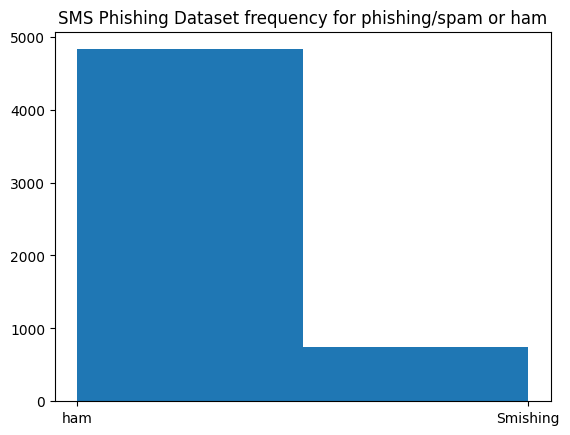

In [73]:
plyt.hist(data['label'], bins=2)
plyt.title("SMS Phishing Dataset frequency for phishing/spam or ham")
plyt.show()

In [53]:
data2

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


In [54]:
data2['LABEL'].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [61]:
data2['LABEL'] = data2['LABEL'].replace('smishing', 'Smishing')
data2['LABEL'] = data2['LABEL'].replace('spam', 'Spam')

In [62]:
data2['LABEL'].unique()

array(['ham', 'Smishing', 'Spam'], dtype=object)

In [63]:
smishing2 = data2[data2['LABEL']=='Smishing'].count()
smishing2

LABEL    638
TEXT     638
URL      638
EMAIL    638
PHONE    638
dtype: int64

In [64]:
spam = data2[data2['LABEL'] == 'Spam'].count()
spam

LABEL    489
TEXT     489
URL      489
EMAIL    489
PHONE    489
dtype: int64

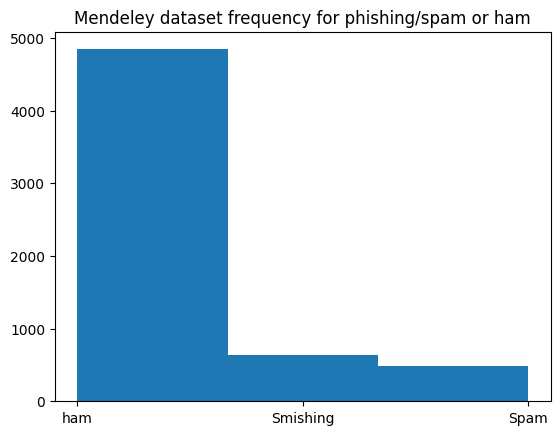

In [74]:
plyt.hist(data2['LABEL'], bins=3)
plyt.title("Mendeley dataset frequency for phishing/spam or ham")
plyt.show()

In [ ]:
print("hello world")